In [1]:
# Import necessary libraries
import torch
import pandas as pd
import matplotlib.pyplot as plt

# Import your GPT-2 and T5 summarizer classes
from run_summarizer_t5 import Summarizer as t5
from run_summarizer_gpt2 import Summarizer as gpt2

# Initialize the summarizers
gpt_model = "./gpt2-finetuned-email-summary"
t5_model = "./saved_t5_summary_model"

gpt2_summarizer = gpt2(path=gpt_model)
t5_summarizer = t5(path=t5_model)

## note the below code was produced using chatGPT to test the performance of the models based on human evaluation feedback. 


In [3]:
# Define 30 test emails, some with and some without subject lines
test_emails = [
    "Dear Team, the project update meeting originally scheduled for Friday has been moved to Monday at 3 PM. Please update your calendars. Best, Emily.",
    "Our Q2 performance showed a 10% revenue increase, primarily driven by strong sales in the European market.",
    "Hi Sarah, could you please review and approve the attached contract by end of day tomorrow? Let me know if you have any questions. Thanks, James.",
    "We are planning to implement new cybersecurity protocols starting next month. More details will follow in the next team meeting.",
    "Dear Finance Team, we need an additional $5,000 for the marketing campaign due to higher-than-expected costs. Approval needed by Friday. Best, Marketing Team.",
    "Please be informed that the office will be closed on Monday due to a public holiday. Normal operations will resume on Tuesday.",
    "Hi Alex, this is a reminder that the final draft of the report is due by Friday at noon. Let me know if you need any assistance. Regards, Lisa.",
    "The client has requested a few changes to the proposal. We need to incorporate them and resend by tomorrow.",
    "You are invited to a training session on project management best practices next Thursday at 2 PM in the main conference room.",
    "Please remember to submit your timesheets by the end of the day today to avoid any delays in payroll processing.",
    "We are pleased to announce that the new version of our software will be released next week, featuring several user-requested updates.",
    "The kickoff meeting for the new project will be held on Tuesday at 10 AM. All team members are expected to attend.",
    "The IT department will be conducting maintenance on the internal server this Saturday from 10 PM to 2 AM. Access may be limited during this time.",
    "Please submit your travel reimbursement forms by Friday to ensure timely processing.",
    "The annual company picnic is scheduled for June 15th at Riverside Park. Families are welcome to join.",
    "Please review the updated remote work policy attached to this email. Let me know if you have any questions.",
    "We received positive feedback from the client regarding the recent project delivery. Great job, everyone!",
    "If you need any additional equipment for your workspace, please submit a request by the end of the week.",
    "Our team achieved a 95% customer satisfaction rating last quarter, a significant improvement over the previous period.",
    "Your annual performance review is scheduled for next Wednesday. Please prepare any relevant documents.",
    "We are launching a new mentorship program next month. If you are interested in participating, please contact HR.",
    "The renovation of the third-floor office space will be completed by the end of the month.",
    "Please update your contact information in the employee portal to ensure that we have accurate records.",
    "Orientation for new hires will take place on Monday at 9 AM in the training room.",
    "The monthly newsletter will be distributed next week. Please submit any content you would like included by Friday.",
    "The internal system will be offline for maintenance this weekend from 8 PM Saturday to 6 AM Sunday.",
    "We are implementing a new performance management system next quarter. More information will be shared soon.",
    "The next marketing strategy meeting will be held on Thursday at 11 AM in the conference room.",
    "Please complete the employee satisfaction survey by the end of the week. Your feedback is valuable to us.",
    "The company holiday party is scheduled for December 20th. Please RSVP by December 10th."
]


In [4]:
# Function to generate summaries from GPT-2 and T5 models
def generate_summaries(emails):
    summaries = []
    for email in emails:
        gpt2_summary = gpt2_summarizer.summarize(email)
        t5_summary = t5_summarizer.summarize(email)
        summaries.append({"Email": email, "GPT-2 Summary": gpt2_summary, "T5 Summary": t5_summary})
    return summaries

# Generate summaries and store in a variable
summary_results = generate_summaries(test_emails)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask an

In [5]:
# Function to display summaries side-by-side for human evaluation
def display_summaries(summaries):
    evaluations = []
    for i, result in enumerate(summaries):
        print(f"\n### Email {i + 1}:")
        print(f"Original Email:\n{result['Email']}")
        print(f"\nGPT-2 Summary:\n{result['GPT-2 Summary']}")
        print(f"\nT5 Summary:\n{result['T5 Summary']}")
        
        # Collect input from human evaluator
        choice = input("Which summary is better? (1: GPT-2, 2: T5, 0: Both equally good): ")
        evaluations.append(choice)
    return evaluations

# Display summaries and collect evaluations
evaluations = display_summaries(summary_results)



### Email 1:
Original Email:
Dear Team, the project update meeting originally scheduled for Friday has been moved to Monday at 3 PM. Please update your calendars. Best, Emily.

GPT-2 Summary:
Dear Team, the project update meeting originally scheduled for Friday has been moved to Monday at 3 PM. Please update your calendars. Best, Emily. the the.

T5 Summary:
Emily confirms that the project update meeting originally scheduled for Friday has been moved to Monday at 3 PM. She requests updates on the calendars.

### Email 2:
Original Email:
Our Q2 performance showed a 10% revenue increase, primarily driven by strong sales in the European market.

GPT-2 Summary:
Our Q2 performance showed a 10% revenue increase, primarily driven by strong sales in the European market. the and the the to the. and and.. to and to.

T5 Summary:
Unsere Q2 performance showed a 10% revenue increase, driven by strong sales in the European market. The performance was driven by strong sales.

### Email 3:
Original E

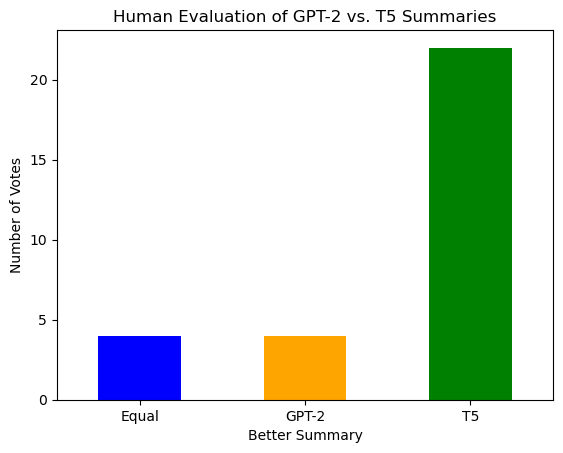

In [6]:
# Convert evaluations to a DataFrame for analysis
evaluation_df = pd.DataFrame({'Model': evaluations})

# Count the number of times each model was preferred
results = evaluation_df['Model'].value_counts().sort_index()

# Map numeric values to model names for better visualization
results.index = results.index.map({'1': 'GPT-2', '2': 'T5', '0': 'Equal'})

# Plot the evaluation results
results.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Human Evaluation of GPT-2 vs. T5 Summaries')
plt.xlabel('Better Summary')
plt.ylabel('Number of Votes')
plt.xticks(rotation=0)
plt.show()
